In [2]:
import os

In [3]:
pip install tenserflow

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tenserflow (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for tenserflow


In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from keras.models import Sequential
from PIL import Image
from keras.layers import Conv2D,Dense,Dropout,Flatten,MaxPooling2D,BatchNormalization

In [5]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

OneHotEncoder()

In [6]:
data=[]
results=[]
paths=[]
for r, d, f in os.walk(r"C:\Users\harsh\OneDrive\Desktop\yes"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))
for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        results.append(encoder.transform([[0]]).toarray())


In [7]:
paths=[]
for r,d,f in os.walk(r"C:\Users\harsh\OneDrive\Desktop\no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        results.append(encoder.transform([[1]]).toarray())


In [8]:
data=np.array(data)
data.shape

(139, 128, 128, 3)

In [9]:
results=np.array(results)
results=results.reshape(139,2)
# print(results.size)


In [10]:
print(len(results))



139


In [11]:
print(len(data))

139


In [12]:
x_train,x_test,y_train,y_test=train_test_split(data,results,test_size=0.2,shuffle=True,random_state=0)

In [13]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

C:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      33,554,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,585,602 (128.12 MB)

 Trainable params: 33,585,410 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


In [14]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - loss: 44.5023 - val_loss: 56.2837
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - loss: 24.6763 - val_loss: 31.5355
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - loss: 10.8058 - val_loss: 5.9699
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - loss: 5.2650 - val_loss: 3.1791
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - loss: 2.2868 - val_loss: 8.6802
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - loss: 2.1169 - val_loss: 15.4664
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - loss: 2.3253 - val_loss: 9.8060
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - loss: 1.6696 - val_loss: 3.5895
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - loss: 0.8296 - val_loss: 2.4438
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - loss: 0.4643 - val_loss: 2.3389
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - loss: 0.0979 - val_loss: 2.2676
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - loss: 0.1788 - val_loss: 2.2640
Epoch 13/30
3/3 ━━

In [15]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

Its a Tumor


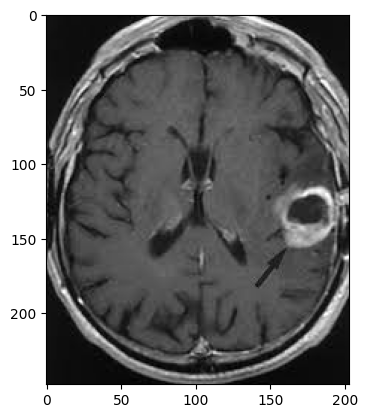

In [16]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\harsh\OneDrive\Desktop\imag2.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print( names(classification))